<a href="https://colab.research.google.com/github/Panatore/RoomsClassifier/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
hello = tf.constant('Hello, Tensorflow!')
print(hello)

tf.Tensor(b'Hello, Tensorflow!', shape=(), dtype=string)


In [8]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


# Load the data of the directory

In [5]:
data_dir = "./data"

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256,256),
  batch_size=32)

Found 934 files belonging to 5 classes.
Using 748 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256,256),
  batch_size=32)

Found 934 files belonging to 5 classes.
Using 186 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['Bathroom', 'Bedroom', 'House Map', 'Kitchen', 'Living Room']


Show a sample of the 9 first images

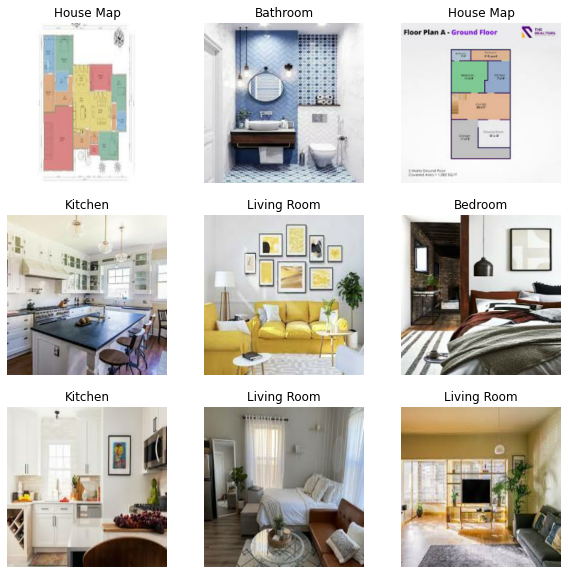

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


# Preprocess data

Scale the image dividing it by 255

In [15]:
from keras.layers import Rescaling

In [16]:
normalization_layer = Rescaling(1./255)

In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image),np.max(first_image))

0.0 1.0


# Split the data

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

In [19]:
numberOfClass = len(class_names)

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (256,256,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

In [22]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


c:\Users\danie\OneDrive\Documentos\GitHub\RoomsClassifier\env\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 29s 1s/step - loss: 308.8174 - accuracy: 0.2193 - val_loss: 1.6710 - val_accuracy: 0.2366
Epoch 2/10
24/24 [==============================] - 30s 1s/step - loss: 1.3683 - accuracy: 0.4559 - val_loss: 1.7961 - val_accuracy: 0.2849
Epoch 3/10
24/24 [==============================] - 31s 1s/step - loss: 0.9982 - accuracy: 0.6631 - val_loss: 2.1467 - val_accuracy: 0.2796
Epoch 4/10
24/24 [==============================] - 31s 1s/step - loss: 0.5016 - accuracy: 0.8356 - val_loss: 2.3439 - val_accuracy: 0.3441
Epoch 5/10
24/24 [==============================] - 32s 1s/step - loss: 0.3323 - accuracy: 0.9238 - val_loss: 2.8874 - val_accuracy: 0.3495
Epoch 6/10
24/24 [==============================] - 32s 1s/step - loss: 0.2406 - accuracy: 0.9465 - val_loss: 3.3429 - val_accuracy: 0.3710
Epoch 7/10
24/24 [==============================] - 31s 1s/step - loss: 0.1563 - accuracy: 0.9706 - val_loss: 3.6565 - val_accuracy: 0.3602
Epoch 8/10
24/24 [===========

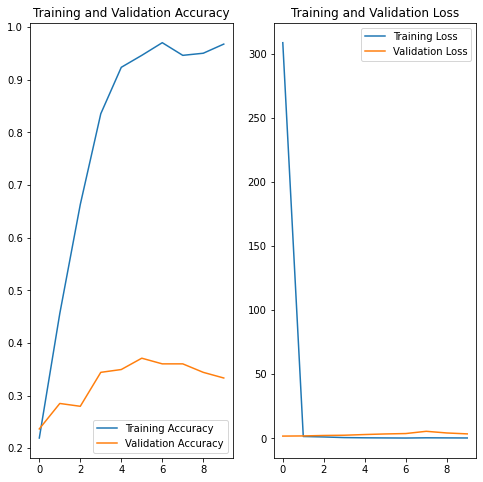

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input

In [2]:
width_shape = 224
height_shape = 224
num_classes = 5
epochs = 50
batch_size = 32 

In [6]:

train_datagen = ImageDataGenerator( 
    rescale= 1./255,
    rotation_range=40,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    horizontal_flip=True,
    validation_split= 0.2)

valid_datagen = ImageDataGenerator(rescale= 1./255, validation_split= 0.2)

train_generator = train_datagen.flow_from_directory(data_dir,
    target_size=(width_shape, height_shape),
    color_mode="rgb",
    class_mode='categorical',
    subset= "training",
    batch_size= batch_size)

valid_generator = valid_datagen.flow_from_directory(data_dir,
    target_size=(width_shape, height_shape),
    color_mode="rgb",
    class_mode='categorical',
    subset= "validation",
    batch_size= batch_size)


Found 748 images belonging to 5 classes.
Found 186 images belonging to 5 classes.


In [7]:
import scipy

In [35]:
print(train_generator.next()[0][1])

[[[0.8117648  0.81568635 0.8235295 ]
  [0.8117648  0.81568635 0.8235295 ]
  [0.8117648  0.81568635 0.8235295 ]
  ...
  [0.76470596 0.7607844  0.74509805]
  [0.76470596 0.7607844  0.74509805]
  [0.76470596 0.7607844  0.74509805]]

 [[0.804475   0.8083966  0.8162397 ]
  [0.809296   0.8132176  0.8210607 ]
  [0.8117648  0.81568635 0.8235295 ]
  ...
  [0.76470596 0.7607844  0.74509805]
  [0.76470596 0.7607844  0.74509805]
  [0.76470596 0.7607844  0.74509805]]

 [[0.7974035  0.8013251  0.8091682 ]
  [0.7990106  0.80293214 0.8107753 ]
  [0.8018525  0.8057741  0.8136172 ]
  ...
  [0.76470596 0.7607844  0.74509805]
  [0.76470596 0.7607844  0.74509805]
  [0.76470596 0.7607844  0.74509805]]

 ...

 [[0.47815773 0.41541263 0.3565891 ]
  [0.46427366 0.4059012  0.35145026]
  [0.4247724  0.3789565  0.33024764]
  ...
  [0.46725795 0.43980697 0.40059128]
  [0.5019608  0.47450984 0.43529415]
  [0.5019608  0.47450984 0.43529415]]

 [[0.52103025 0.4582851  0.39946157]
  [0.4181033  0.36302873 0.31187567]


In [29]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from keras.models import Model

In [30]:
image_input = Input(shape= (224,224,3))

model = MobileNetV2(input_tensor= image_input, include_top= False, weights= 'imagenet')

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                